In [1]:
import os 
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
paths=[
    "/Users/aaronmulvey/Documents/Proyectos ML/Brain Cancer Detector /data/archive/Training/",
    "/Users/aaronmulvey/Documents/Proyectos ML/Brain Cancer Detector /data/archive/Testing/"
    ]

In [ ]:
# Función para mostrar imágenes en escala de grises utilizando Matplotlib
def imshow(img):
    # Crear una figura y un solo eje (ax) para la visualización
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    # Mostrar la imagen en el eje creado, utilizando un mapa de colores en escala de grises
    ax.imshow(img, cmap='gray')


In [ ]:
# Obtener las posibles etiquetas de los datos
# Se asume que los nombres de las carpetas dentro de la ruta paths[0]
# representan las etiquetas posibles para clasificar.
possible_labels = os.listdir(paths[0])


In [ ]:
possible_labels

['pituitary', 'notumor', 'glioma', 'meningioma']

In [ ]:
data = []

# Recorremos las diferentes rutas en la lista 'paths' (Train & Test)
for i, path in enumerate(paths):
    # Iteramos sobre las etiquetas posibles (como entero y su respectiva cadena)
    for label_int, label_string in enumerate(possible_labels):
        # Obtenemos todas las rutas de imágenes con extensión .jpg dentro de la carpeta correspondiente
        image_paths = glob.glob(path + label_string + '/*.jpg')
    
        for filename in image_paths:
    
            img = cv2.imread(filename)    
            # Redimensionamos la imagen a un tamaño fijo (320x320) y la añadimos junto con su etiqueta a la lista 'data'
            data.append([label_int, cv2.resize(img, (320, 320))])

# Verificamos la cantidad total de datos almacenados
len(data)

data[:5]  # Muestra las primeras 5 filas de la lista 'data'

7023

In [ ]:
import random

# Mezclamos los datos para asegurar un orden aleatorio
random.Random(0).shuffle(data)

# Inicializamos las listas para entrenamiento, validación y prueba
x_train, y_train = [], []
x_val, y_val = [], []
x_test, y_test = [], []

# Dividimos los datos en conjuntos de entrenamiento, validación y prueba
for i, sample in enumerate(data):
    label = sample[0]  # La etiqueta de la imagen
    img = sample[1]    # La imagen procesada
    
    # Asignamos el 80% de los datos al conjunto de entrenamiento
    if i <= 0.8 * len(data):
        x_train.append(img)
        y_train.append(label)
    # Asignamos el siguiente 10% al conjunto de validación
    elif i > 0.8 * len(data) and i <= 0.9 * len(data):
        x_val.append(img)
        y_val.append(label)
    # El restante 10% va al conjunto de prueba
    else:
        x_test.append(img)
        y_test.append(label)

# Convertimos las listas a arrays de NumPy para facilitar su manipulación en modelos de ML
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)


In [34]:
x_test.shape

(702, 320, 320, 3)

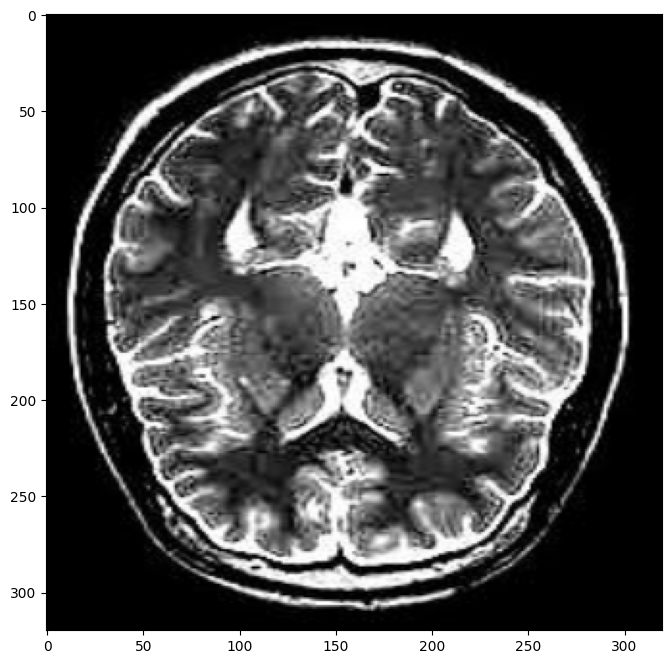

In [35]:
imshow(x_train[0])


In [39]:
y_train[0]

1

In [40]:
possible_labels[y_train[0]]

'notumor'

In [ ]:
import tensorflow as tf

# Convertimos las etiquetas de entrenamiento, validación y prueba a formato one-hot encoding
# Esto es útil para problemas de clasificación, donde cada clase se representa como un vector binario
y_trainOneHot = tf.one_hot(y_train, len(possible_labels))  # Etiquetas del conjunto de entrenamiento
y_valOneHot = tf.one_hot(y_val, len(possible_labels))      # Etiquetas del conjunto de validación
y_testOneHot = tf.one_hot(y_test, len(possible_labels))    # Etiquetas del conjunto de prueba


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [44]:
def cnn_model():
    model = Sequential()
    model.add(Convolution2D(32,(3,3),input_shape=(320,320,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(30,activation='relu'))
    model.add(Dense(4,activation='softmax'))
    model.compile(optimizer='SGD', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [45]:
model=cnn_model()
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 318, 318, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 159, 159, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 808992)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │    24,269,790 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,270,810 (92.59 MB)

 Trainable params: 24,270,810 (92.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

# Crear directorios de salida si no existen
# 'checkpoint' se usará para guardar los modelos entrenados
# 'logs/cnn_logs' se usará para guardar los registros de TensorBoard
os.makedirs("checkpoint", exist_ok=True)
os.makedirs("logs/cnn_logs", exist_ok=True)

# Definir el callback para guardar los modelos en cada época
checkpoint = ModelCheckpoint(
    filepath='checkpoint/model.{epoch:02d}.keras',  # Guardar modelos en formato .keras
    save_best_only=False,                           # No solo guarda el mejor modelo, sino todos por época
    save_freq='epoch'                               # Guardar después de cada época
)

# Definir el callback para TensorBoard
tensorboard_callback = TensorBoard(
    log_dir='logs/cnn_logs',  # Carpeta donde se almacenarán los registros de TensorBoard
    histogram_freq=1          # Frecuencia para calcular histogramas (en cada época)
)


In [52]:
x_train.shape

(5619, 320, 320, 3)

In [53]:
x_val.shape

(702, 320, 320, 3)

In [54]:
model.fit(x_train,
          y_trainOneHot,
          epochs=20,
          batch_size=100,
          validation_data=(x_val,y_valOneHot),
          callbacks=[tensorboard_callback,checkpoint]
)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 232s 4s/step - accuracy: 0.4686 - loss: 25050.8027 - val_accuracy: 0.7365 - val_loss: 0.8565
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 219s 4s/step - accuracy: 0.7625 - loss: 0.7794 - val_accuracy: 0.7151 - val_loss: 1.0150
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.7792 - loss: 0.7083 - val_accuracy: 0.8077 - val_loss: 0.7106
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 235s 4s/step - accuracy: 0.8113 - loss: 0.6384 - val_accuracy: 0.7920 - val_loss: 0.6863
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.7903 - loss: 0.6422 - val_accuracy: 0.8048 - val_loss: 0.6393
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - accuracy: 0.8359 - loss: 0.5719 - val_accuracy: 0.8205 - val_loss: 0.5958
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.8338 - loss: 0.5635 - val_accuracy: 0.8177 - val_loss: 0.5742
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.8376 - loss: 0.5387 - val_accuracy: 0.8447

In [58]:
# Predecir la clase para el primer ejemplo del conjunto de prueba (x_test[0:1])
# Utilizamos model.predict para obtener las probabilidades de cada clase
predicted_label = possible_labels[np.argmax(model.predict(x_test[0:1]))]

# Mostrar la etiqueta predicha
predicted_label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


'meningioma'

In [59]:
# Obtener la etiqueta real de la primera muestra del conjunto de prueba
real_label = possible_labels[y_test[0]]

# Mostrar la etiqueta real
real_label


'glioma'

In [60]:
# Evaluar el modelo utilizando el conjunto de prueba
# 'x_test' contiene las imágenes de prueba
# 'y_testOneHot' contiene las etiquetas en formato one-hot encoding
evaluation_metrics = model.evaluate(x=x_test, y=y_testOneHot)

# Mostrar los resultados de la evaluación
evaluation_metrics


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.8596 - loss: 0.4528


[0.46343517303466797, 0.8547008633613586]

In [69]:
# Carga los pesos previamente guardados en el modelo.
# Asegúrate de que el modelo ya esté definido con la misma arquitectura
# que se usó al guardar estos pesos.
model.load_weights("./checkpoint/model.20.keras")


In [70]:
# Evalúa el modelo en los datos de prueba.
# 'x_test' contiene las características (inputs) del conjunto de prueba.
# 'y_testOneHot' contiene las etiquetas del conjunto de prueba, codificadas en formato one-hot.
# Este método devuelve dos valores: 
# - La pérdida (loss) calculada en el conjunto de prueba.
# - La métrica de rendimiento (como la precisión) si está definida en el modelo.
model.evaluate(x=x_test, y=y_testOneHot)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - accuracy: 0.8596 - loss: 0.4528


[0.46343517303466797, 0.8547008633613586]

In [73]:
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Cargar el modelo y las etiquetas
model.load_weights("./checkpoint/model.20.keras")  # Cargar los pesos
possible_labels = os.listdir(paths[0])  # Lista de etiquetas disponibles

# Función para mostrar la imagen seleccionada y predecir su clase
def predict_image():
    # Abrir el explorador de archivos para seleccionar una imagen
    file_path = filedialog.askopenfilename(
        title="Selecciona una imagen",
        filetypes=[("Archivos de imagen", "*.jpg *.jpeg *.png")]
    )
    
    if not file_path:
        print("No se seleccionó ninguna imagen.")
        return

    # Cargar y procesar la imagen seleccionada
    img = cv2.imread(file_path)
    img_resized = cv2.resize(img, (320, 320))
    img_array = np.expand_dims(img_resized, axis=0)  # Expandir dimensión para el modelo

    # Realizar la predicción
    predictions = model.predict(img_array)
    predicted_label = possible_labels[np.argmax(predictions)]

    # Mostrar la imagen y la predicción
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(f"Predicción: {predicted_label}")
    ax.axis("off")
    plt.show()

# Crear la ventana principal
root = tk.Tk()
root.title("Predicción de imágenes")
root.geometry("300x200")

# Botón para abrir la ventana de selección de archivos
button = tk.Button(root, text="Seleccionar imagen", command=predict_image)
button.pack(pady=50)

# Ejecutar la aplicación
root.mainloop()
